## Продолжим?

In [1]:
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

In [2]:
import warnings
pd.set_option("display.max_rows", 10)

from matplotlib import rcParams
rcParams.update({"figure.max_open_warning": 0,
                 "savefig.bbox": "tight"})

theme_set(theme_gray(base_size=12))

import os
os.system(f"pip install scikit-misc")

0

Категории датафрейма mpg:
* manufacturer – производитель,
* model – модель,
* displ – рабочий объём двигателя в литрах,
* year – год выпуска,
* cyl – число цилиндров,
* trans – тип коробки передач,
* drv – тип привода,
* cty – расход топлива в городе (миль/галлон),
* hwy – расход топлива на трассе (миль/галлон)
* fl – тип топлива
* class – класс автомобиля

In [3]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


## Начнём с простого, со всевозможных подписей: к графикам, к осям, к значениям. Подписи добавляются с использованием функции labs(). Вот, например, заголовок графика:

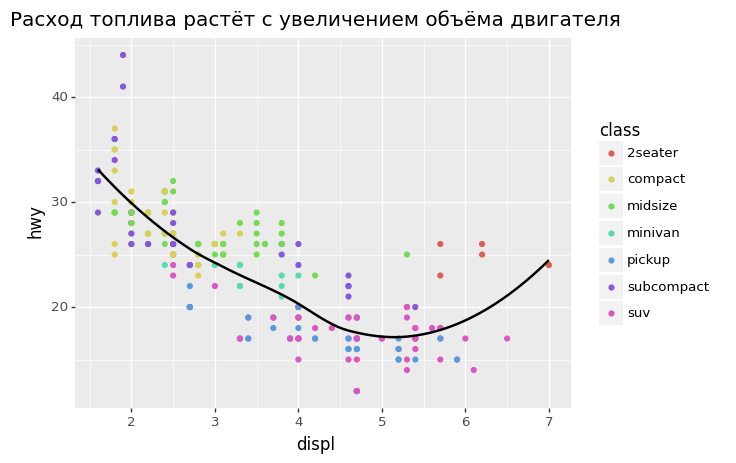

<ggplot: (8762944103412)>

In [4]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth(se=False) +\
labs(title="Расход топлива растёт с увеличением объёма двигателя")

## Основной целью заголовка является обобщение основного результата наблюдения. Избегайте заголовков, которые просто описывают графики, например,  "Диаграмма зависимости расхода топлива от объёма двигателя".

## Также вы можете использовать labs() для задания названий осей и легенд. Как правило, хорошей идеей будет заменить формальные обозначения категорий на более развёрнутое их описание с указанием размерности (при необходимости).

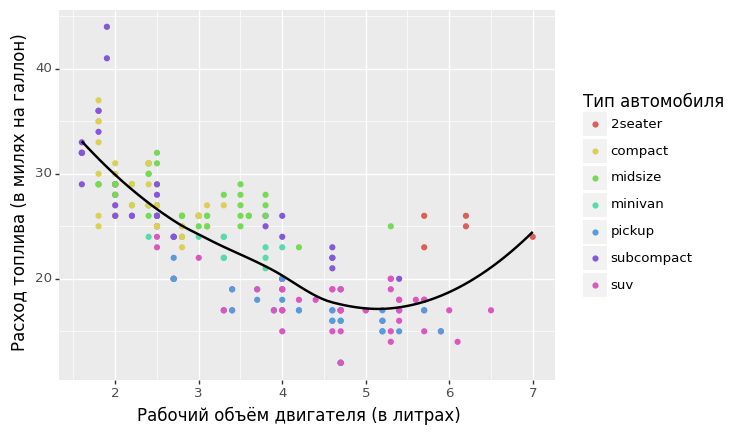

<ggplot: (8762939126010)>

In [5]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_smooth(se=False) +\
labs(x="Рабочий объём двигателя (в литрах)",
     y="Расход топлива (в милях на галлон)",
     colour="Тип автомобиля")

### Создайте график на основе датафрейма mpg с заданными вручную заголовком, и осями x и y.

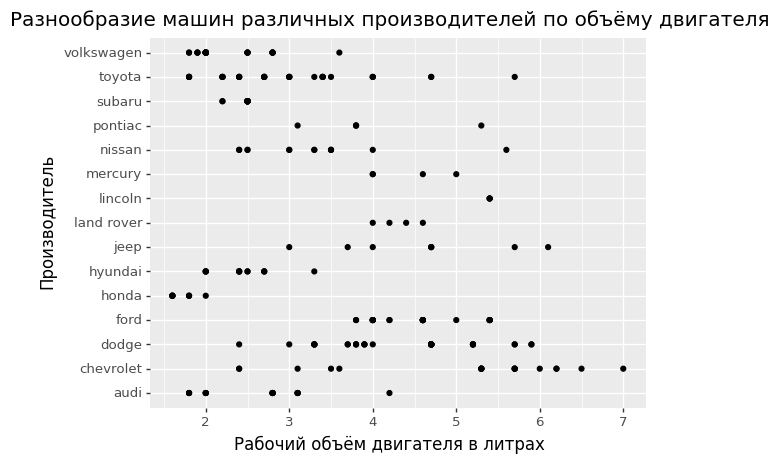

<ggplot: (8762944119438)>

In [6]:
# My code
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="manufacturer")) +\
labs(title="Разнообразие машин различных производителей по объёму двигателя",
     x='Рабочий объём двигателя в литрах',
     y='Производитель')

### Для одного из графиков, сформированных в прошлой лабораторной по собственным данным, придумайте название и подписи к осям.

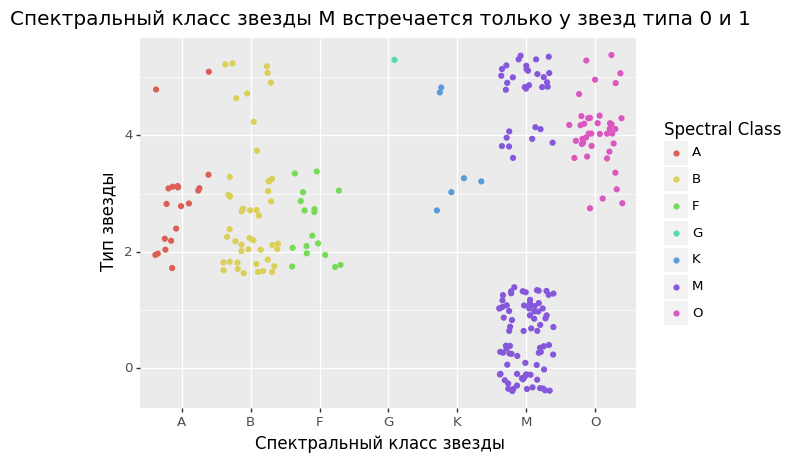

<ggplot: (8762937461387)>

In [7]:
data = pd.read_csv("../data/Star_dataset.csv")
ggplot(data) +\
geom_point(aes(x='Spectral Class', y="Star type", color='Spectral Class'), position='jitter') +\
labs(title="Спектральный класс звезды M встречается только у звезд типа 0 и 1",
     x="Спектральный класс звезды",
     y="Тип звезды")

## Кроме основных элементов графика, можно подписывать и отдельные наблюдения. Сначала попробуем использовать geom_text(). У него все те же свойства, что у geom_point(), но добавляется свойство label.
## В качестве источника данных создадим датафрейм, в который поместим самую эффективную по расходу топлива марку автомобиля для каждого класса.

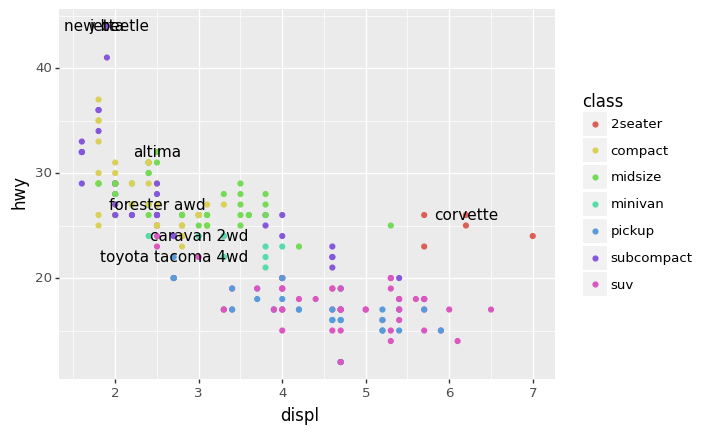

<ggplot: (8762937505085)>

In [8]:
best_in_class = mpg\
.sort_values(by="hwy", ascending=False)\
.groupby("class")\
.first()

ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_text(aes(label="model"), data=best_in_class)

## Выглядит не очень. Текст перекрывает как сам себя, так и точки. Немного улучшить ситуацию можно заменив geom_text() на geom_label(), заодно добавив прозрачности и небольшой сдвиг по y.

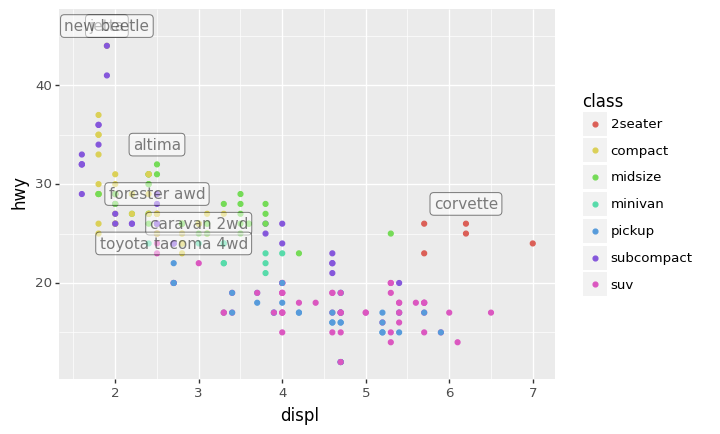

<ggplot: (8762937443407)>

In [9]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_label(aes(label="model"), data=best_in_class, nudge_y=2, alpha=0.5)

## Стало лучше, но в верхнем левом углу надписи всё ещё перекрывают друг друга. Устранить это перекрытие, используя одинаковое смещение для всех текстовых блоков, не получится. К счастью, есть переменная adjust_text.

К несчастью его использовать не получается даже при наличии `pip install adjustText`.

In [10]:
!pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


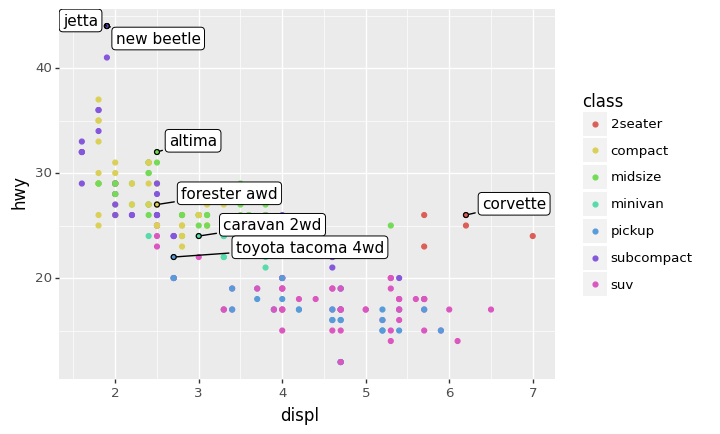

In [11]:
# My code
from adjustText import adjust_text
try:
  plot = ggplot(mpg, aes("displ", "hwy")) +\
  geom_point(aes(colour="class")) +\
  geom_point(data=best_in_class, fill='none') +\
  geom_label(aes(label="model"), data=best_in_class, adjust_text={
      'expand_points': (1.5, 1.5),
      'arrowprops': {
          'arrowstyle': '-'
      }})
  print(plot)
except Exception as e:
  print(e)

## Вместо легенды иногда можно использовать тот же приём. Это не очень приятно выглядит на конкретном графике, но вообще может быть полезным.

<ipython-input-12-abcc6e75473c>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


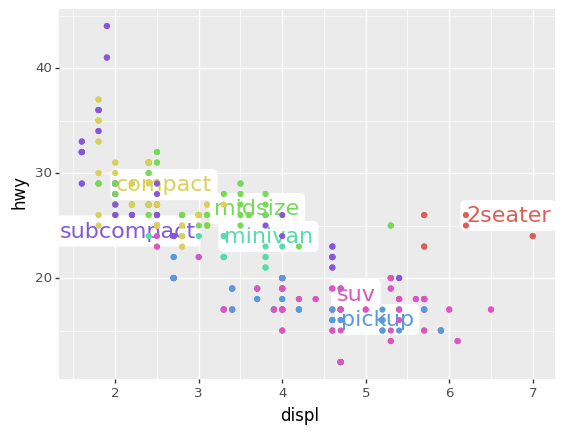

In [12]:
# My code
try:
  class_avg = mpg\
  .groupby("class")["displ","hwy"].median()\
  .reset_index()

  plot = ggplot(mpg, aes("displ", "hwy", colour="class")) +\
  geom_point() +\
  geom_label(aes(label="class"), data=class_avg, size=16, label_size=0, adjust_text={'expand_points': (0, 0)}) +\
  geom_point() +\
  theme(legend_position="none")
  print(plot)
except Exception as e:
  print(e)

## На график можно добавить и простой фрагмент текста. Но для этого всё равно нужен будет DataFrame. 

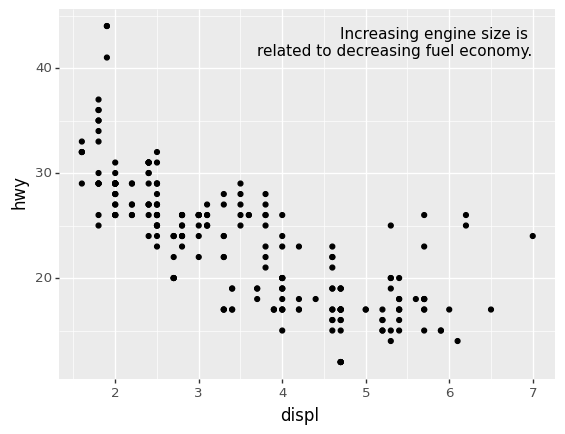

<ggplot: (8762934604541)>

In [13]:
label = pd.DataFrame({"displ": [mpg.displ.max()],
                      "hwy": [mpg.hwy.max()],
                      "label": "Increasing engine size is \nrelated to decreasing fuel economy."})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

## Чтобы поместить текст в самый край нужно будет использовать `+np.Inf` и `-np.Inf`:

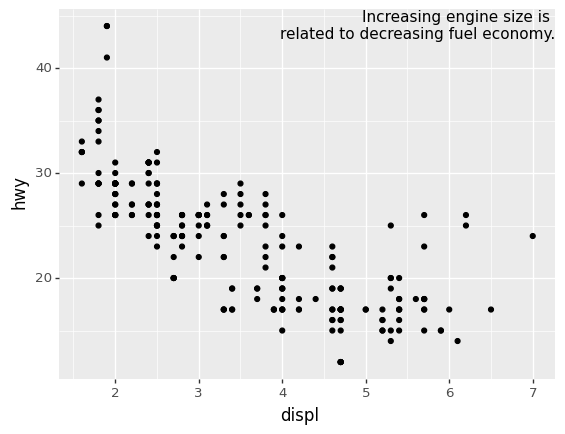

<ggplot: (8762939127131)>

In [14]:
label = pd.DataFrame({"displ": [np.Inf],
                      "hwy": [np.Inf],
                      "label": "Increasing engine size is \nrelated to decreasing fuel economy."})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

## Во всех этих примерах перенос слов между строками производился вручную с использованием `"\n"`. Можно использовать функцию `fill` из модуля `textwrap`.

In [15]:
from textwrap import fill

print(fill("Increasing engine size is related to decreasing fuel economy.", width=40))

Increasing engine size is related to
decreasing fuel economy.


## Параметры `ha` и `va` определяют местоположение текста. Все девять вариантов – ниже.

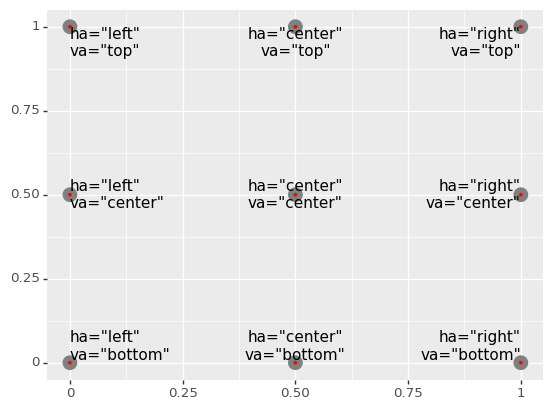

<ggplot: (8762934506234)>

In [16]:
from itertools import product

has = ["left", "center", "right"]
vas = ["top", "center", "bottom"]
xs = [0, 0.5, 1]
ys = [1, 0.5, 0]

df = pd.DataFrame([{"x": xs[x],
                    "y": ys[y],
                    "ha": has[x],
                    "va": vas[y],
                    "label": f"ha=\"{has[x]}\"\nva=\"{vas[y]}\""}
                   for x, y in product(range(3), repeat=2)])

ggplot(df, aes("x", "y")) +\
geom_point(colour="grey", size=5) +\
geom_point(size=0.5, colour="red") +\
geom_text(aes(label="label", ha="ha", va="va")) +\
labs(x=None, y=None)

### Используйте `geom_text()` с положением в бесконечности, чтобы поместить текст в каждый из четырёх углов графика

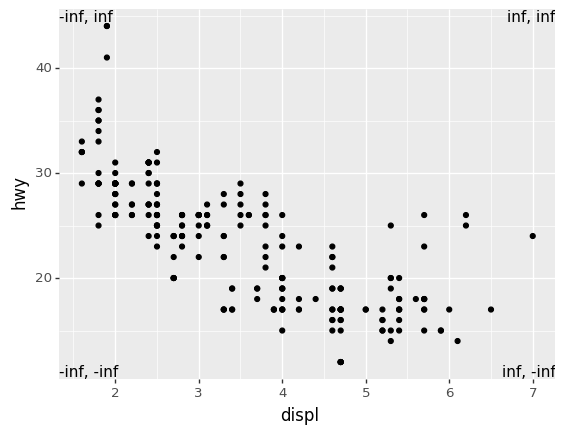

<ggplot: (8762937371567)>

In [17]:
# My code
label = pd.DataFrame({"displ": [np.Inf,-np.Inf,-np.Inf,np.Inf],
                      "hwy": [np.Inf,np.Inf,-np.Inf,-np.Inf],
                      "label": ['inf, inf','-inf, inf','-inf, -inf','inf, -inf']})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va=["top","top",'bottom','bottom'], ha=["right",'left',"left",'right'])

### Поэкспериментируйте, как `geom_text()` работает с панелями. Сможете добавить подпись в одну выбранную панель?

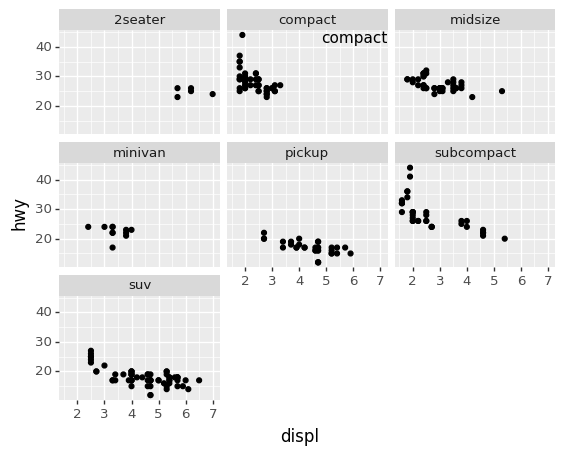

<ggplot: (8762934537768)>

In [18]:
# My code
label = pd.DataFrame({"displ": [np.Inf],
                      "hwy": [np.Inf],
                      'class': 'compact',
                      "label": "compact"})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
facet_wrap("class", nrow=3) +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

### Используйте `geom_hline()` или `geom_vline()` для обозначения пороговых значений.

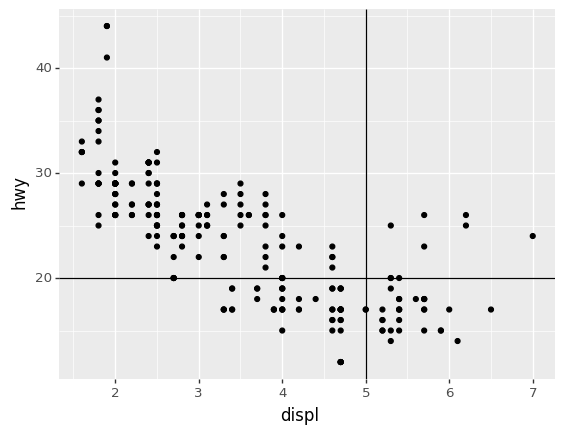

<ggplot: (8762937449051)>

In [19]:
# My code
ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_hline(yintercept=20) +\
geom_vline(xintercept=5)

### Используйте `geom_rect()`, чтобы нарисовать область интереса на графике.

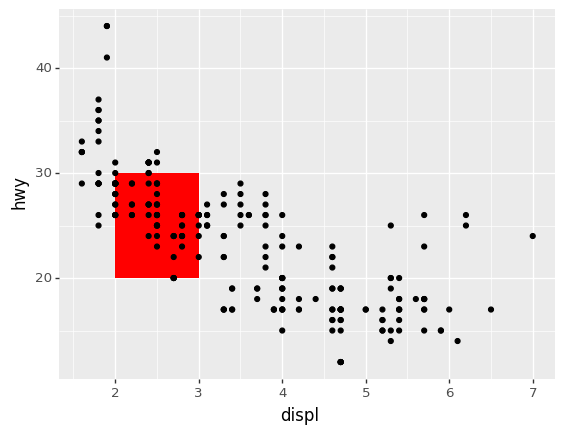

<ggplot: (8762937458330)>

In [20]:
# My code
ggplot(mpg, aes("displ", "hwy")) +\
geom_rect(aes(xmin=2, ymin=20, xmax=3, ymax=30),fill='red')+\
geom_point() 

### Используйте `geom_segment()`, чтобы нарисовать стрелку на графике.

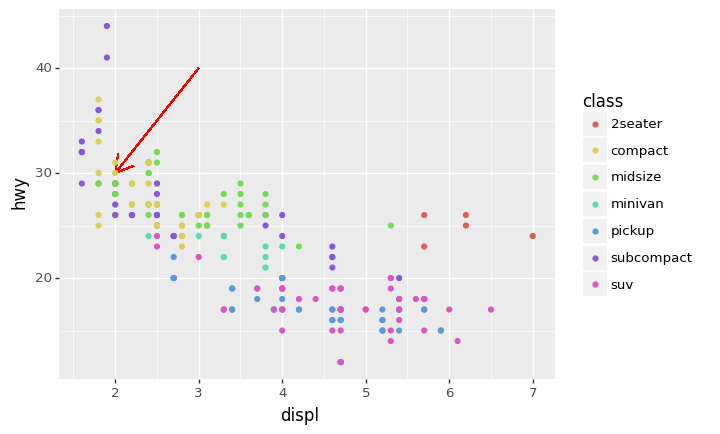

<ggplot: (8762937491475)>

In [21]:
# My code
ggplot(mpg, aes("displ", "hwy")) +\
geom_segment(aes(x=3, y=40, xend=2, yend=30,), color='red', arrow = arrow()) +\
geom_point(aes(color='class')) 

## Ещё один способ улучшить понятность графиков – выбрать правильные масштабы осей.
## Обратите внимание на разницу между `breaks` и `labels`. Первые – это засечки на осях, а вторые – подписи у этих засечек.

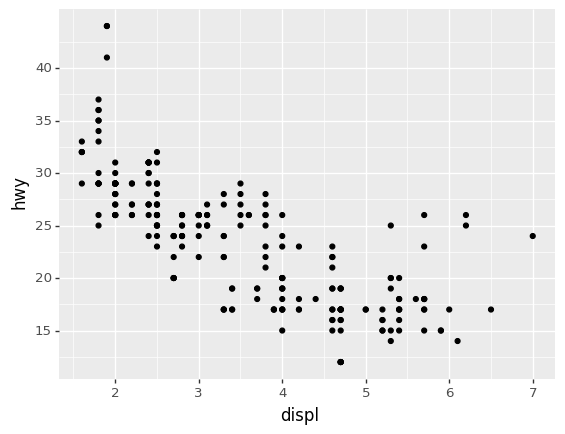

<ggplot: (8762937508654)>

In [22]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
scale_y_continuous(breaks=range(15, 45, 5))

## Можно, например, передать в качестве 'labels' список пустых строк нужного размера.

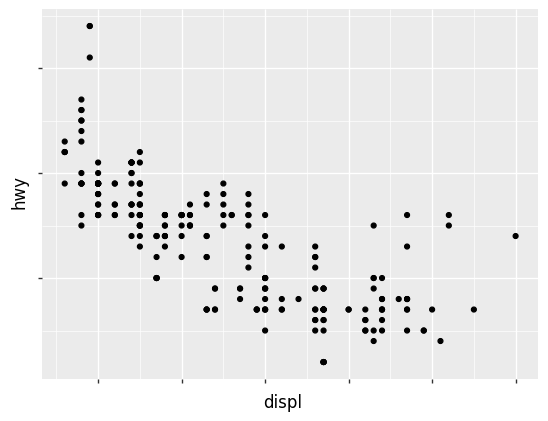

<ggplot: (8762934224884)>

In [23]:
def no_labels(values):
    return [""] * len(values)

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
scale_x_continuous(labels=no_labels) +\
scale_y_continuous(labels=no_labels)

## Можно использовать `breaks` в случае, когда у вас мало конкретных значений, и вам хочется акцентировать внимание именно на них.

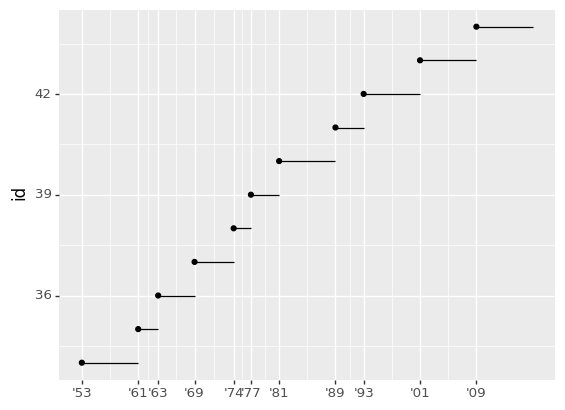

<ggplot: (8762934216942)>

In [24]:
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_x_date(name="", breaks=presidential.start, date_labels="'%y")

## Местоположение легенды. В целом, всё тривиально.

In [25]:
base = ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class"))

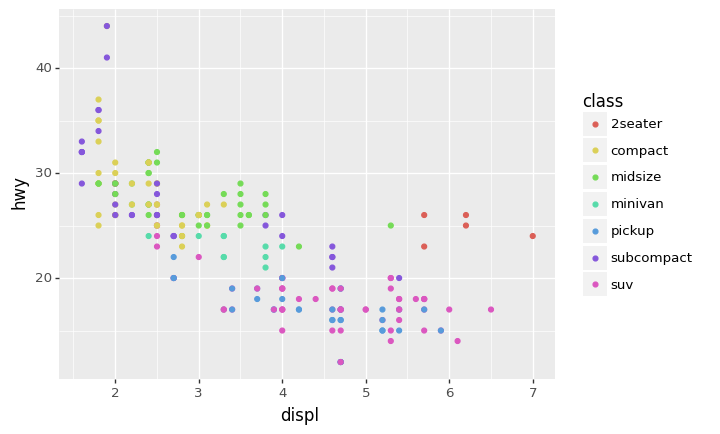

<ggplot: (8762937508855)>

In [26]:
base + theme(legend_position="right")

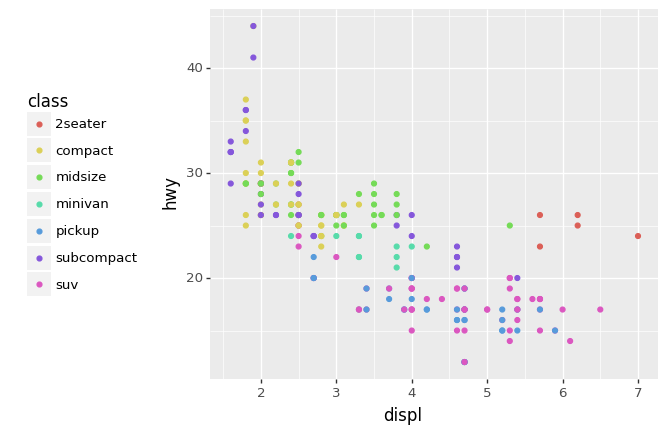

<ggplot: (8762975695080)>

In [27]:
base + theme(subplots_adjust={'left': 0.2}) + theme(legend_position=(0, 0.5))

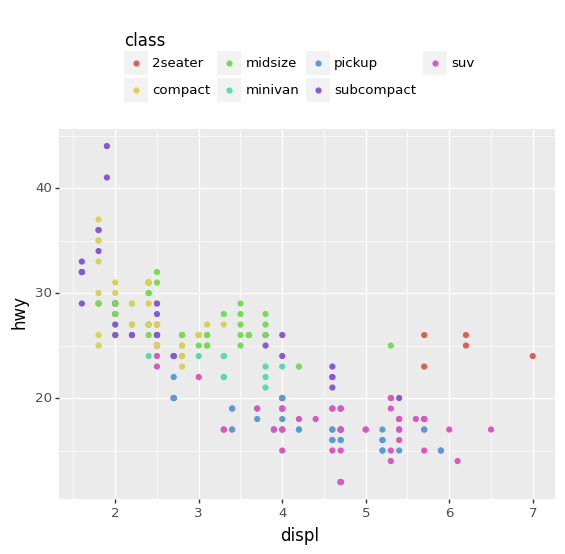

<ggplot: (8762934257628)>

In [28]:
base + theme(legend_position="top")

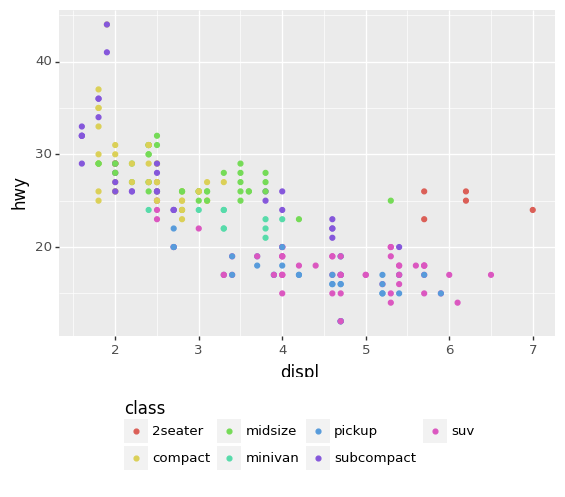

<ggplot: (8762934107552)>

In [29]:
base + theme(subplots_adjust={'bottom': 0.2}, legend_position=(.5, 0), legend_direction='horizontal')

## Можно вообще убрать легенду с помощью `legend_position="none"`.

### С использованием `guides` можно настроить вид легенды ещё более детально.

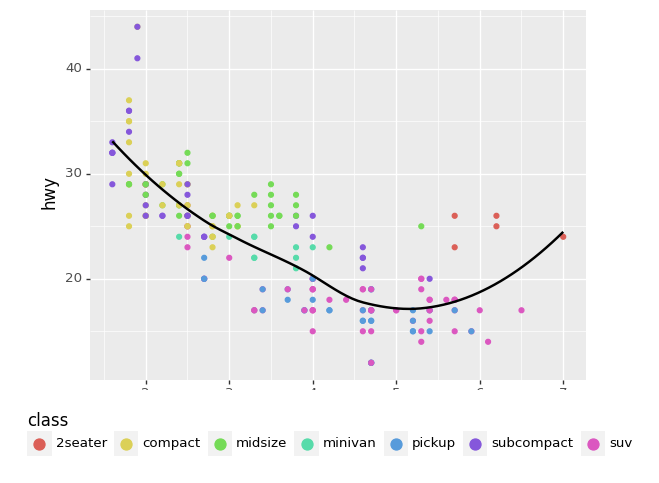

<ggplot: (8762934065631)>

In [30]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_smooth(se=False) +\
theme(legend_position="bottom") +\
guides(colour=guide_legend(nrow=1, override_aes={"size": 4}))

## Масштаб и шкала осей

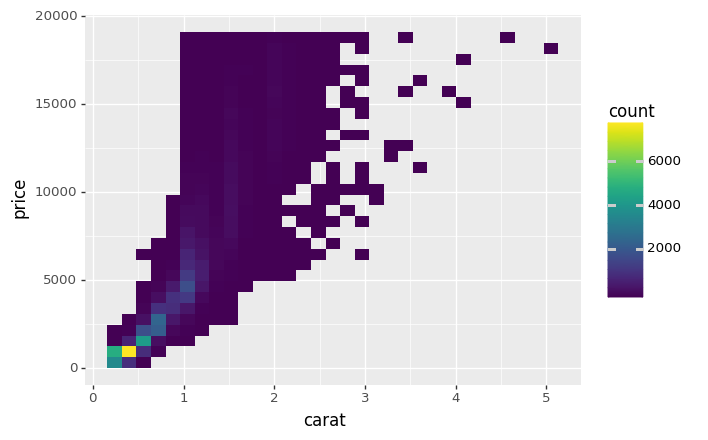

<ggplot: (8762934011251)>

In [31]:
ggplot(diamonds, aes("carat", "price")) +\
geom_bin2d()

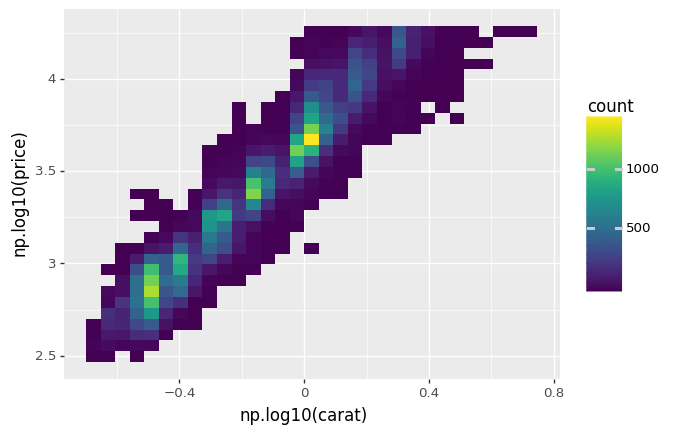

<ggplot: (8762933909779)>

In [32]:
ggplot(diamonds, aes("np.log10(carat)", "np.log10(price)")) +\
geom_bin2d()

## Чтобы значения на осях остались исходными можно воспользоваться переопределением осей: `scale_x_log10()` и `scale_y_log10()`.

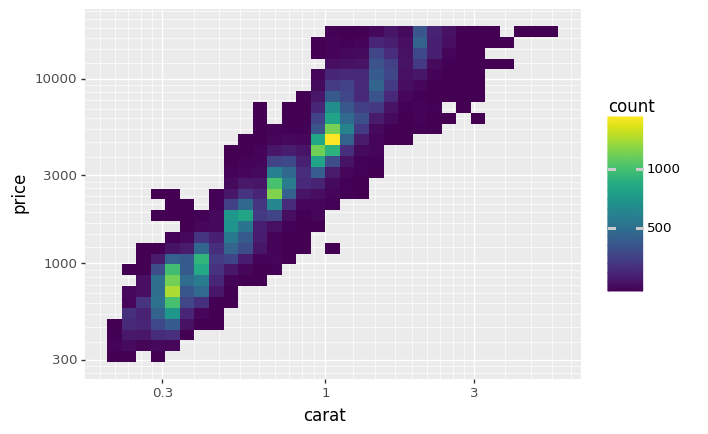

<ggplot: (8762934187945)>

In [33]:
ggplot(diamonds, aes("carat", "price")) +\
geom_bin2d() +\
scale_x_log10() +\
scale_y_log10()

## Также часто переопределяют значения цветов.
## Вот так график выглядит по умолчанию

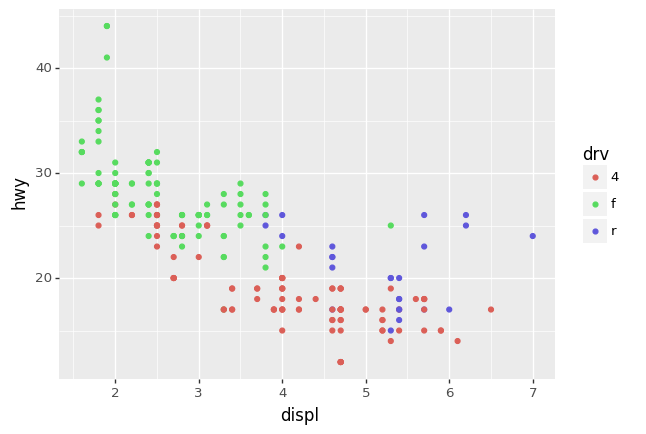

<ggplot: (8762933881423)>

In [34]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv"))

## А так для `palette="Set1"`

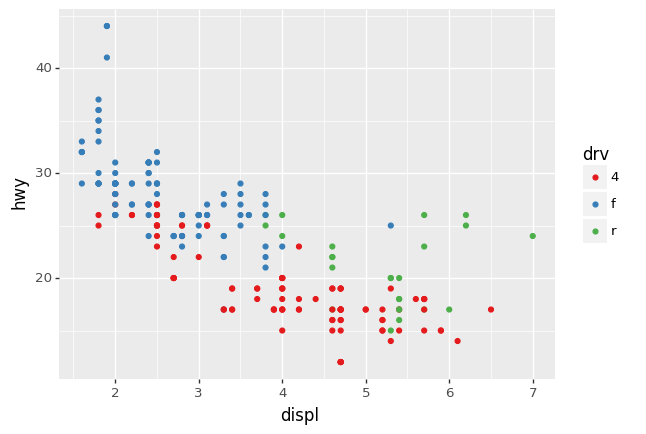

<ggplot: (8762934578707)>

In [35]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv")) +\
scale_colour_brewer(type="qual", palette="Set1")

## А чтобы было ещё более заметно разницу, можно добавить другую форму.

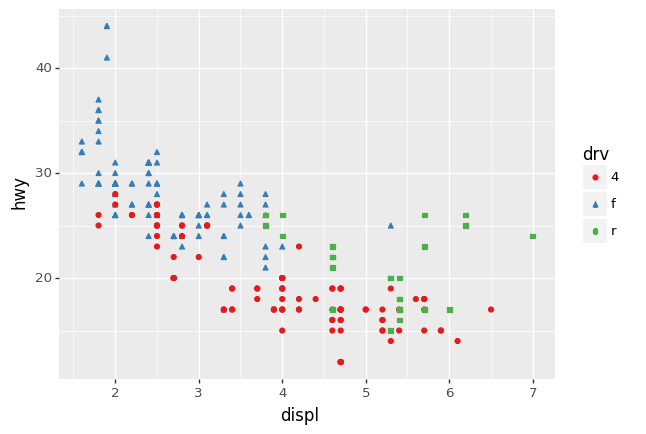

<ggplot: (8762936748273)>

In [36]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv", shape="drv")) +\
scale_colour_brewer(type="qual", palette="Set1")

## Подробнее цветовые схемы описаны тут: <http://colorbrewer2.org/>.

## А ещё можно задать цвета вручную: `scale_colour_manual()`.

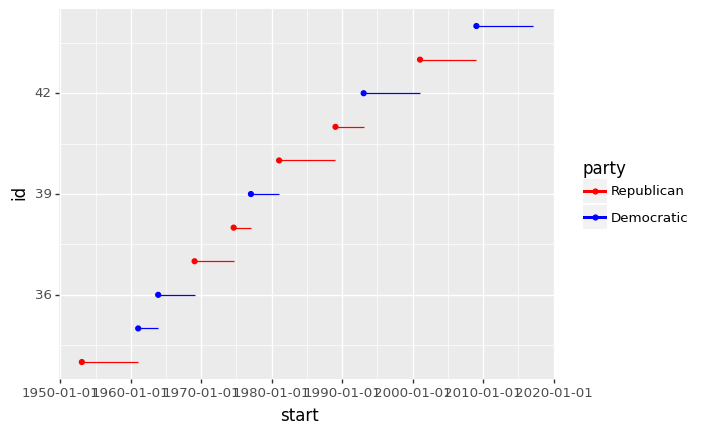

<ggplot: (8762937329032)>

In [37]:
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id", colour="party")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_colour_manual(values=["red", "blue"], limits=["Republican", "Democratic"])

### "Ну поиграйте с цветами, вы же дизайнер"

In [38]:
data["Star color"].unique()

array(['red', 'blue-white', 'white', 'yellowish-white',
       'pale-yellow-orange', 'blue', 'whitish', 'yellow-white', 'orange',
       'white-yellow', 'yellowish', 'orange-red'], dtype=object)

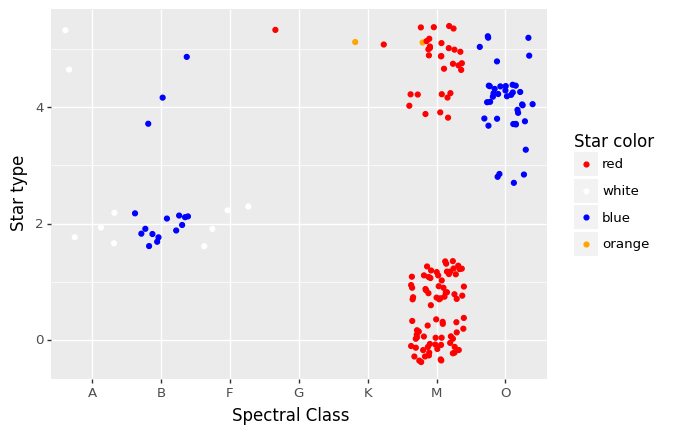

<ggplot: (8762934553658)>

In [39]:
# My code
correct_colors = ["red", 'white', 'blue', 'orange']
ggplot(data.loc[data["Star color"].isin(correct_colors)]) +\
geom_point(aes(x='Spectral Class', y="Star type", color='Star color'), position='jitter') +\
scale_colour_manual(values=correct_colors, limits=correct_colors)

## Иногда результат зависит от пределов значений на графике

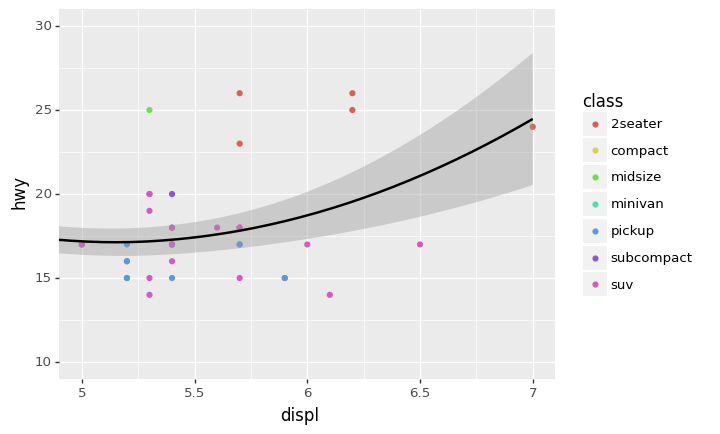

<ggplot: (8762936763926)>

In [40]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth() +\
coord_cartesian(xlim=(5, 7), ylim=(10, 30))

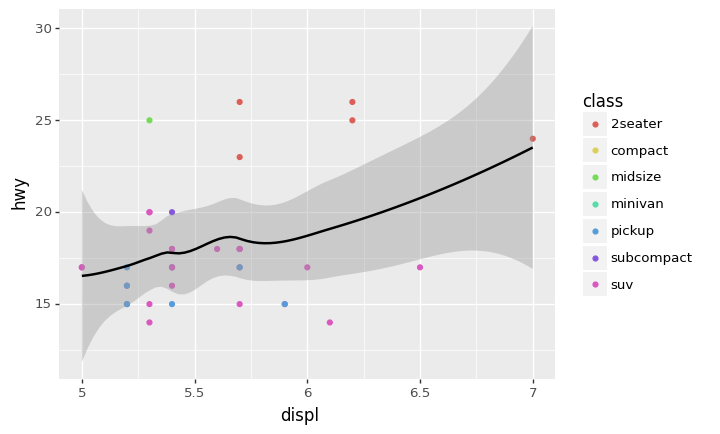

<ggplot: (8762934554995)>

In [41]:
ggplot(mpg.query("5 <= displ <= 7 and 10 <= hwy <= 30"), aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth()

## Когда вы хотите сравнить значения двух графиков с совпадающими осями x и y, имеет смысл зафиксировать максимальные и минимальные значения на этих осях.

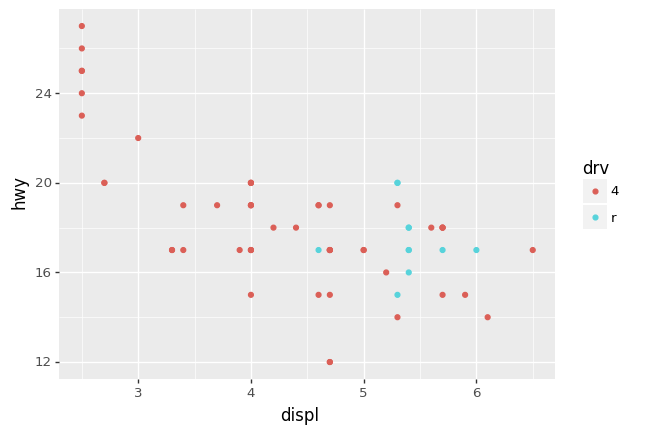

<ggplot: (8762933871210)>

In [42]:
mpg["drv"] = mpg["drv"].astype(str)
suv = mpg[mpg["class"] == "suv"]
compact = mpg[mpg["class"] == "compact"]

ggplot(suv, aes("displ", "hwy", colour="drv")) +\
geom_point()

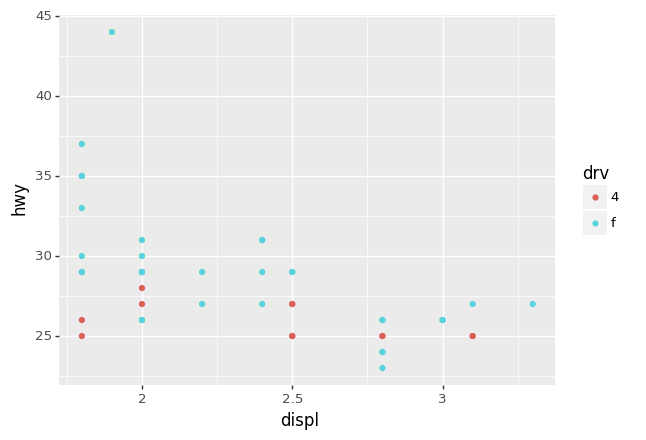

<ggplot: (8762933808469)>

In [43]:
ggplot(compact, aes("displ", "hwy", colour="drv")) +\
geom_point()

## Например, сохранив эти значения в отдельную переменную.

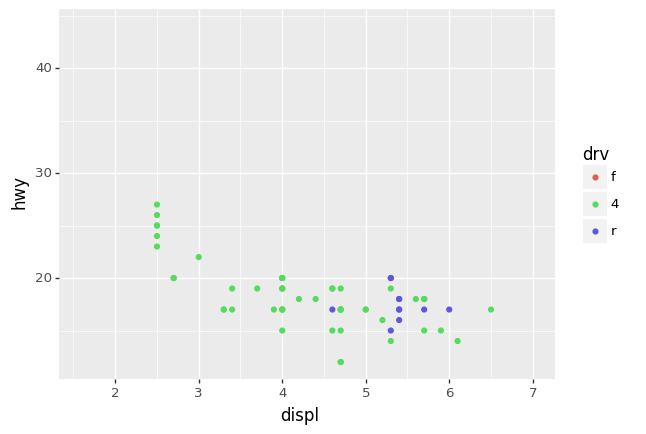

<ggplot: (8762933875414)>

In [44]:
x_scale = scale_x_continuous(limits=(mpg.displ.min(), mpg.displ.max()))
y_scale = scale_y_continuous(limits=(mpg.hwy.min(), mpg.hwy.max()))
col_scale = scale_colour_discrete(limits=mpg.drv.unique())

ggplot(suv, aes("displ", "hwy", colour="drv")) +\
geom_point() +\
x_scale +\
y_scale +\
col_scale

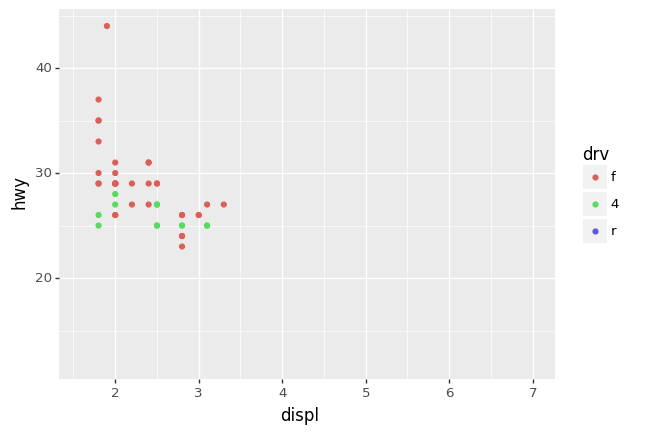

<ggplot: (8762933710897)>

In [45]:
ggplot(compact, aes("displ", "hwy", colour="drv")) +\
geom_point() +\
x_scale +\
y_scale +\
col_scale

## Внешний вид можно менять настройкой тем

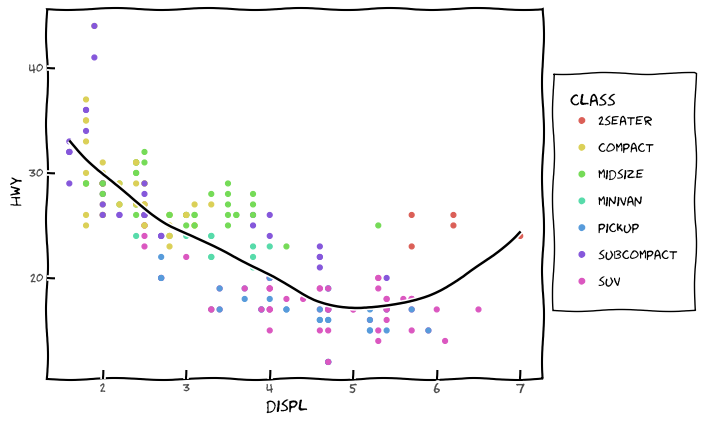

<ggplot: (8762933682586)>

In [46]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth(se=False) +\
theme_xkcd()

## Сохранить последний нарисованный график можно с использованием:
## `_.save("my-plot.pdf")`
## В качестве настроек используются: `width`, `height`, `units`, и `dpi`. 